In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydap.client import open_url
import xarray as xr

In [7]:
#Import gridded PDSI data
pdsi = xr.open_dataset('https://thredds.northwestknowledge.net/thredds/dodsC/agg_met_pdsi_1979_CurrentYear_CONUS.nc')
pdsi

c:\ProgramData\Anaconda3\lib\site-packages\xarray\backends\plugins.py:139: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
c:\ProgramData\Anaconda3\lib\site-packages\xarray\backends\plugins.py:139: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
c:\ProgramData\Anaconda3\lib\site-packages\pydap\handlers\dap.py:120: UserWarning: PyDAP was unable to determine the DAP protocol defaulting to DAP2 which is consider legacy and may result in slower responses. For more, see go to https://www.opendap.org/faq-page.
  _warnings.warn(


<xarray.Dataset>
Dimensions:                                   (lat: 585, crs: 1, lon: 1386,
                                               day: 3270)
Coordinates:
  * lat                                       (lat) float64 49.4 49.36 ... 25.07
  * crs                                       (crs) float32 3.0
  * lon                                       (lon) float64 -124.8 ... -67.06
  * day                                       (day) datetime64[ns] 1980-01-05...
Data variables:
    daily_mean_palmer_drought_severity_index  (day, lat, lon) float32 ...
    category                                  (day, lat, lon) float32 ...
Attributes: (12/20)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.0
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    note1:                      The projection information for this file is: ...
    baseperiod:                 1980-2019 base period.
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [9]:
#Subset to gridcell with Marcell in it
pdsi_marcell = pdsi.sel(lat = [47.514], method = 'nearest').sel(lon = [-93.468], method = 'nearest')
pdsi_marcell

<xarray.Dataset>
Dimensions:                                   (lat: 1, crs: 1, lon: 1, day: 3270)
Coordinates:
  * lat                                       (lat) float64 47.53
  * crs                                       (crs) float32 3.0
  * lon                                       (lon) float64 -93.47
  * day                                       (day) datetime64[ns] 1980-01-05...
Data variables:
    daily_mean_palmer_drought_severity_index  (day, lat, lon) float32 ...
    category                                  (day, lat, lon) float32 ...
Attributes: (12/20)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.0
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    note1:                      The projection information for this file is: ...
    baseperiod:                 1980-2019 base period.
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

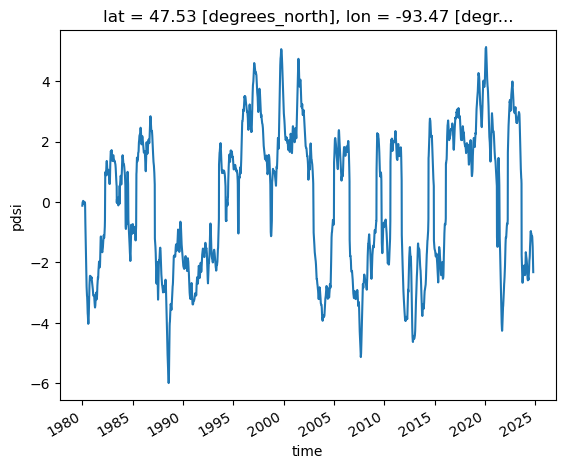

In [14]:
#Plot
pdsi_marcell.daily_mean_palmer_drought_severity_index.plot()

In [38]:
#format for export
pdsi_df = pdsi_marcell.to_dataframe().reset_index(drop = False)
pdsi_df = pdsi_df.drop(columns = ['lat', 'crs', 'lon'])

#Fill missing dates using nearest neighbor
dates = pd.date_range(min(pdsi_df.day), max(pdsi_df.day)) 
pdsi_df = pdsi_df.set_index('day').reindex(dates).interpolate(method='nearest').ffill().bfill().reset_index(drop = False)
pdsi_df = pdsi_df.rename(columns = {"daily_mean_palmer_drought_severity_index":"PDSI", "index":"Date"})

#Export
pdsi_df.to_csv('.\mef-data\CONUS_PDSI_processed_data.csv', index = False)
pdsi_df.head()

,Date,PDSI,category
0,1980-01-05,-0.12,5.0
1,1980-01-06,-0.12,5.0
2,1980-01-07,-0.12,5.0
3,1980-01-08,-0.06,5.0
4,1980-01-09,-0.06,5.0
